--- 
Project for the course in Microeconometrics | Summer 2020, M.Sc. Economics, Bonn University | [Hyein Jeong](https://github.com/huiren-j)
# Replication of Decarolis, Francesco (2014)  <a class = "tocSkip">
---

This notebook contains my replication of the results from the following paper:

> Decarolis, Francesco. 2014. "Awarding Price, Contract Performance, and Bids Screening: Evidence from Procurement Auctions." American Economic Journal: Applied Economics, 6 (1): 108-32.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1.Introduction</a></span></li>
<li><span><a href="#2.-Theory Overview" data-toc-modified-id="2.-Theory Overview-2">2.Theory Overview</a></span></li>
<li><span><a href="#3.-Empirical Analysis" data-toc-modified-id="3.-Empirical Analysis-3">3.Empirical Analysis</a></span></li>
<li><span><a href="#4.-Identification" data-toc-modified-id="4.-Identification-4">4.Identifiation</a></span></li>
<li><span><a href="#5.-Replication of Decarolist(2014)" data-toc-modified-id="5.-Replication of Decarolist(2014)-5">5.Replication of Decarolist(2014)</a></span></li>
<ul class="toc-item"><li><span><a href="#5.1. Data-&amp;-Descriptive Statistics" data-toc-modified-id="#5.1. Data-&amp;-Descriptive Statistics-5.1">5.1. Data &amp; Descriptive Statistics</a></span></li>
<li><span><a href="#5.2. Results" data-toc-modified-id="#5.2. Results-5.2">5.2. Results</a></span></li>
<li><span><a href="#5.3. Robustness Checks" data-toc-modified-id="#5.3. Robustness Checks-5.3">5.3. Robustness Checks</a></span></li>
<li><span><a href="#5.4. IE Sample" data-toc-modified-id="#5.4. IE Sample-5.4">5.4. IE Sample</a></span></li>
</ul><li><span><a href="#6.-Extension" data-toc-modified-id="6.-Extension-7">6.Extension</a></span></li>
<ul class="toc-item"><li><span><a href="#6.1. Extension: Assumption Check with IE Sample" data-toc-modified-id="##6.1. Extension: Assumption Check with IE Sample-6.1">6.1. Extension: Assumption Check with IE Sample</a></span></li>
</ul><li><span><a href="#7.-Conclusion" data-toc-modified-id="7.-Conclusion-7">7.Conclusion</a></span></li>
<li><span><a href="#8.-Reference" data-toc-modified-id="8.-Reference-8">8.Reference</a></span></li>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linearmodels import PanelOLS
import statsmodels.api as sm
import econtools as econ
import econtools.metrics as mt
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from auxiliary.prepare import *
from auxiliary.table2 import *
from auxiliary.table3 import *
from auxiliary.table4 import *
from auxiliary.table5 import *
from auxiliary.table6 import *
from auxiliary.table7 import *
from auxiliary.extension import *
from auxiliary.table_formula import *

---
# 1. Introduction
---

Decarolis examined the effect of the switch to First Price Auction(FPA) from Average Bid Auction(ABA) for public procurement in Italy. The main difference between FPA and ABA is the way to determine the winner. While ABA chooses the winner with algorithm to remove unreliable bids which sometimes results in removing the lowest bid price, FPA selects the lowest bid price as a winner. Due to high competitive chararcteristic of FPA, it is known as a good method for public procuremnet with a lower cost and high transparency. However, the author aruges that it is not the case when the object of procurement is a contract. To figure out it, he studied the effect of FPAs not only on winning price but also on performance quality and screening cost.  

The results are obtained through a difference-in-differences(DD) identification strategy. It is applied seperately to two PAs,the County of Turin and the Municipality of Turin, that switched to FPAs in 2003. The observed period is from 2000 to 2006 and observed PAs are filtered by their reserve price above €300,000. As a result, the sign of coefficients were same in both PAs but the magnitude were different and even doubled in the latter. The author figured out that it is caused by screening process which delays the announce of the winner as excluding the most likely to be a winner but at the same time, the most unreliable bid. In the final part of this paper, the author used additional data about roadework jobs auctions from 2006 to 2011. This part showed the importance of the ex post bid screening for the effective use of FPAs by comparing the voluntarily switcher group and the switcher forced by the restriction on the use of ABAs.  

**Main variables** 

| **Treatment**      | **Main outcomes**          | **Main Covariates**    |
|------------------- |----------------------------|------------------------|
| First Price Auction| Winning discount           | Public Administration  |
|                    | Cost overrun               | Time                   |                         
|                    | Completion time delay      |                        |
|                    | Days to award the contract |                        |  


I will replicate *AWarding Price, Contract Performance, and Bids Screening: Evidence from Procurement Auctions, Decarolis(2014)* in this notebook. After replicating the result of this paper and three types of robustness checks provided by the author, I will evaluate the results with the additional data sample, Information Entrepreneur, which covers different period from the main dataset(the Italian Authority for Public Contracts).

---
# 2. Theory Overview
---  

Before having a look at the study, knowing the changes in regulations on public procurement and the response of PAs is needed. The main period the paper handled is between January 2000 and June 2006. In this period, the regulation required the use of ABAs for all contracts with reserve price below €5 million. Afterwards, Europe Union regulation commanded the use of FPAs for contract at or above this value. In 2003, as collusion in ABAs was revealed, the Municipality of Turin replace ABAs with FPAs and then the County of Turin followed. However, the central government tackled to these reforms in the court and then similar reforms in other PAs was blocked. The below figure shows the time line of these reforms.

![Here should be timeline](files/timeline.jpg)  


The theorical background is based on "auctions and Contract Enforcement" of Spulber(1990). According to the paper, what differentiate auctions for contracts from auctions for goods is cost uncertainty because transaction in auction for contracts does not take place immediately. This characteristic of auctions for contracts gives the auctioneer different trade-offs between the savings due to a high winning discount and the losses due to poor performance quality.  
  
There are **Two types of Trade-offs**
   *  The Trade-off between **the Winning Bid and Performance**  
    : From high competition in FPAs, PAs are able to benefit with high winning discount. However, there is the risk that the winning firm will default intentionally to increasing their discounts as reported in Decarolis(2013) or the risk to lower performance quality and time delays.  
    
   *  The Trade-Off between **Performance and the Screening Cost**  
    : There are three systems to avoid performance quality risk: financial guarantees to support bids, ex ante prequalification requirements for bidders, and ex post screening of bids reliability. The Italian system allows PAs to conduct ex post screening. Nevertheless, as the screening system ultimately lessens competition, equilibrium prices become higher than without the screening. 

To add more explanation about ABA, one of the main factors distinguishing ABA from FPA is the way to determine the winning discount. ABA remove all unreliable and risky bids. Thus the bidders offer higher bids than FPA and the bids tend to concentrate in a narrow range, near truncated mean. Therefore, the expected effects of a switch from ABA to FPA is to decrease of the price at the awarding stage, to worsen ex post performance and to increase bid screening.


---
# 3. Empirical Strategy
---  

To study the effect of the switch to FPA, the author used the methology similar with a difference-in-differences(DD) regression exploiting the difference in the timing with which Turin adpoted FPAs relative to PAs. The interest of variable is FPA dummy variable. The author takes PA and Time into account as fixed effect, because they affects to the dependent variables. The model follows:  

\begin{align*}
Y_{ist} = a_s + b_t + cX_{ist} + \beta FPA_{st} + \epsilon_{ist}
\end{align*}  

* $i$ indicates the auction
* $s$ indicates the PA
* $t$ indicates the year
* $FPA$ is one for FPAs and zero for ABAs
* $X$ indicates other covariates
* $Y_{ist}$ denotes the outcomes of the auction: winning discount, performance, screening cost
* $a$ is PA fixed effect
* $b$ is time fixed effect


---
# 4. Identification
---  
There are two main challenges to interpret $\beta$ as the causal effect of the switch to FPAs. The first one is that the treated PAs, the Municipality of Turin and the County of Turin, switched to FPAs voluntarily, not assigned randomly. This implies that the positive effects of FPAs observed regarding Turin could be overestimated compared to other PAs. The second challenge is that the DD strategy lies in features of the pretreatment regime because this feature can affect the contruction of the DD estimator and its interpretation.  

To address the first challenge, this paper relies on the two assumptions. The first assumption is that the **treated are randomly selected** since the treated does not seem like abandoned ABAs because they expected the positive effect of FPAs. This assumption is based on the juridical situation associated with ABAs in 2003. At that time, several firms were accused on charges of collusion in ABAs. These firms were not from Turin and also participated in auctions held in other regions. This became a trigger for Turin to switch to FPAs. Furthermore, there were other collustion cases on courts in other PAs during the same period. Therefore, the reason why the PAs in Turin were the first swicher to FPAs is that they were the first one which confronted with this juridical case, not related to the expected effect of the introduction of FPAs.  

The second assumption is that, thus, **if the central government had not blocked the switch to FPAs, then other PAs would have abandoned ABAs** as like the PAs in Turin did. This assumption can be justified by the situation after July 2006 when both FPAs and ABAs are available again. The Information Entrepreneur sample(IE sample),which includes data of roadwork jobs auction outcomes from July 2006 to July 2011, shows that 26 PAs voluntarily adopted FPAs between July 2006 and October 2008. Also, the author checked that population of the region the administration has juridiction over and the number of times holding auctions is the only statistically significant variables on the adoption of FPAs.  

The second main challenge is **the charateristics observed in PA level**. In particular, ABAs has a narrow range of winning price. Nevertheless, the approximate mode of the bid distribution differs depending on PAs while it is stable within PAs over time and across contracts. Caviello and Mariniello(2011) reported that information on both past and future auction is easily available. In addition, Colney and Decarolis(2012) figured out that the availability of this information induce the unreliable bidding behavior described above and the behavior is possible to be compatible with an equilibrium. This implies that the necessity of taking PA fixed effects into accounts.

The causal graph below illustrate the relationship between *First Price Auction* ***D***, *other covariates* ***X*** and *dependent variables* ***Y1,Y2,Y3*** which express winning discount, performance quality and screening cost. X can represents several variables, for example, reserve price, fiscal efficiency and so on. Additionally, since PAs' decisions for auction type depend on population and the number of times of auctions, *Public Administration* ***P*** also included in the causal graph.  

![Here should be causal graph](files/causal.jpg)  


To evaluate the effect of FPAs on winning discount, performance and screening cost, it is necessary to which variables in data can represent each of them. They will be four: winning discount, cost overrun, delay to completion and days to award.  

 * **Winning discount**  
    *discount* : the rebate (between 0% and 100%) over the reserve price
 * **Performnace**  
     a. *cost overrun*: the difference between final payment and the winning bid as a percentage of the reserve price  
     b. *delay to completion*: the difference between the actual and the contractual time as a percentage of the contractual time  
 * **Screening cost**  
    *days to award* : the difference in days between when the bids are opend and when the PA announces the identity of the winner  
    In detail, the screening cost was represented by *days to award* because as PA egineer excludes unreliable bids from the lowest bid price, it takes time to reach higher bid price but seemingly reliable price. Thus, it is plausible that the increase in the number of days to announce the winner leads to select more reliable contractor.  
 

---
# 5. Replication of Decarolis (2014)
---

### 5.1. Data & Descriptive Statistics

In [3]:
data = pd.read_stata('data/Authority.dta')

Dearolis used the database of the Italian Authority for Public Contract which includes the contracts awarded between January 2000 and June 2006.
He filtered the data with following standards:  
* Reserve price: between €300,000 and €5 million
* Work types: the simple types of public work (e.g. roadwork construction and repair jobs)
* Region: five reions in the North (Piedmont, Lombardy, Veneto, Emilia, and Liguria)

The data was already filtered by the author. To add explanation about the standards, first of all reserve price is determined by PA engineers who calculate it by multiplying the required quantities of inputs with region-based input prices. Thus, input prices differs by region but the prices in the chosen regions are so similar that they are comparable. Moreover, the simple work type also helps the reserve price stable. This is because, first of all, there is not too much discretion in quantity of inputs to use and secondly, the geographical area of the chosen regions are similar. Therefore, the filtering based on these standards will be helpful to provide more plausible interpretations of the study.  

Table1 shows the descriptive statistics of the periods before and after the reform in Turin. The County of Turin has over twice more popluation than the Municipality of Turin. Also, the days to award of the County of Turin is lower than the Municipality of Turin in both period. This fact is in the line with the authors finding which is the larger PAs has reduced burden of screening cost relative to the smaller PAs. Also, the treated groups reported higher winning discount mean after reforms while the control groups, other PAs, rather reported lower mean of winning discount.

#### Table1. Descriptive Statistics

In [4]:
#table1: Descriptive Statistics (Jan 2000 to Dec 2002)
df_1 = prepare_data(data)
df_pre = presort_describe(df_1)
table1_presort(df_pre)

1. Municipality of Turin                    \
                                      Mean           SD    N   
Winning discount                   17.0717      5.04908  121   
Extra cost                         5.78489      8.67399   83   
Extra time                         47.1121      53.1709   75   
Days to award                      146.894      40.9554  111   
Reserve price                      919.072      776.756  121   
Number of bidders                  59.9091      26.8533  121   
Population                         900.608  2.73983e-12  121   
Experience                             523            0  121   
Fiscal efficiency                 0.750452    0.0347996  121   

                  2. County of Turin                 3. Other PAs            \
                                Mean          SD   N         Mean        SD   
Winning discount             17.3237     5.89664  63      12.8304   6.16729   
Extra cost                   6.86463     16.9805  45      5.29898   10.6573   
Extra time                   62.8024     66.7607  47      63.2966   75.7257   
Days to award                97.5909     42.6578  44      59.3789   39.8938   
Reserve price                914.095     805.409  63       868.83   710.547   
Number of bidders             40.254     40.4921  63      37.5411   34.5337   
Population                   2242.77  2.7504e-12  63      1023.99   1082.77   
Experience                       416           0  63      186.403   90.9841   
Fiscal efficiency           0.884224   0.0147748  63       0.8131  0.140129   

                         
                      N  
Winning discount   1009  
Extra cost          672  
Extra time          711  
Days to award       768  
Reserve price      1009  
Number of bidders  1009  
Population         1009  
Experience         1009  
Fiscal efficiency  1009

In [5]:
#table1: Descriptive Statistics (Jan 2003 to Dec 2006)
df_post = postsort_describe(df_1)
table1_postsort(df_post)

1. Municipality of Turin                    \
                                      Mean           SD    N   
Winning discount                   30.9739      9.83663  156   
Extra cost                         13.9357      13.8791   79   
Extra time                         56.0595      66.1695   92   
Days to award                      121.383      82.6208   94   
Reserve price                      1370.78      892.667  156   
Number of bidders                  7.61538       9.3391  156   
Population                         900.608  2.73727e-12  156   
Experience                             523            0  156   
Fiscal efficiency                 0.805913    0.0395676  156   

                  2. County of Turin                 3. Other PAs             \
                                Mean         SD    N         Mean         SD   
Winning discount             27.6648    7.24379  137       12.382     5.4445   
Extra cost                    6.6663    9.65511   62      7.99173    13.8449   
Extra time                   79.6506    89.5052   87      53.7268    73.8185   
Days to award                 101.62    49.6456  100      30.6847    34.3186   
Reserve price                 988.45     760.45  137      922.082    791.005   
Number of bidders            12.7153    15.3239  137      46.9946    35.1868   
Population                   2242.78          0  137      388.392    245.926   
Experience                       416          0  137      171.413    75.2393   
Fiscal efficiency           0.866495  0.0323597  137     0.866218  0.0918481   

                        
                     N  
Winning discount   930  
Extra cost         665  
Extra time         697  
Days to award      425  
Reserve price      930  
Number of bidders  930  
Population         930  
Experience         930  
Fiscal efficiency  930

### 5.1.1. Extension(1): Multicollinearity Check

#### Figure1. Multicolinearity Check: Scatter Plots

The figure shows the scatter polot of main dependent variables which will be used for the calculation in the paper. In particular, Municipality variable and First Price Auction variable shows strong correaltion.

In [6]:
df = basic_setting(data)

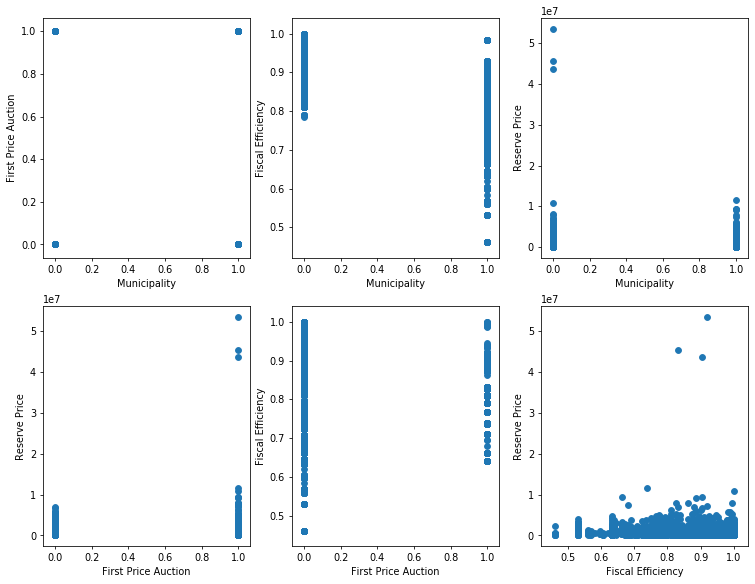

In [7]:
multi_collinearity(df)

##  5.2. Results

Table2 and Table3 shows that the DD estimates for the Municipality of Turin and the County of Turin. Each of them has four panels by the dependents variables. Each panels has 3 control groups. The first control gruop is defined by the population(columns 1 and 2), the second control group is defined by the number of times awarding the contracts which will be denoted by experiece(columns 3 and 4) and the last control group is defined by both population and experience.  
* PanelA: Winning discount
* PanelB: Cost overrun
* PanelC: Completion time delay
* PanelD: Days to award the contract

#### Table2. Difference in Differences: Municipality of Turin

Table2 shows the result of DD regression of the Municipality of Turin. The increase range of winning discount is between 12 and 14 percent. This implies that by adopting FPAs, PAs can save €180 thousand per auction. However, with the performance variables(PanelB and PanelC), the possibility of loss was suggested. Cost overrun ratio reported between 4-7 percent of the reserve price. Completion delay also increased in the range between 19-39 percent of contractual due date. Regarding to screeing cost, the result shows that from 24 to 34 days will be taken.

In [8]:
#table2
table2_reg = table2_list(df)
main_table(table2_reg)

C:\Users\thxkn\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in true_divide
  return 1 - self.ssr/self.centered_tss
C:\Users\thxkn\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\thxkn\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Control(1)    Control(2)    Control(3)  \
Panel value_title                                                     
A     First Price Auction    13.10***      11.99***      13.32***     
      Standard Error         (1.61)        (1.32)        (1.77)       
      R$^2$                  0.505         0.639         0.493        
      Observations           1262          1262          1275         
B     First Price Auction    7.20***       5.87***       5.14**       
      Standard Error         (1.99)        (2.05)        (2.16)       
      R$^2$                  0.111         0.156         0.185        
      Observations           1092          1092          1049         
C     First Price Auction    25.23**       34.18***      19.36*       
      Standard Error         (12.05)       (12.13)       (9.81)       
      R$^2$                  0.085         0.122         0.111        
      Observations           1110          1110          1084         
D     First Price Auction   28.70***      26.23**       27.29**       
      Standard Error        (10.78)       (11.18)       (10.50)       
      R$^2$                 0.554         0.566         0.531         
      Observations          777           777           777           

                             Control(4)    Control(5)    Control(6)  
Panel value_title                                                    
A     First Price Auction    12.02***      13.71***      12.26***    
      Standard Error         (1.47)        (1.72)        (1.38)      
      R$^2$                  0.614         0.526         0.644       
      Observations           1275          880           880         
B     First Price Auction    4.33**        7.25***       5.71**      
      Standard Error         (2.13)        (2.23)        (2.20)      
      R$^2$                  0.214         0.160         0.221       
      Observations           1049          742           742         
C     First Price Auction    27.98***      27.73**       39.28***    
      Standard Error         (10.14)       (10.78)       (12.00)     
      R$^2$                  0.148         0.095         0.147       
      Observations           1084          747           747         
D     First Price Auction   23.54**       34.05***      33.04**      
      Standard Error        (11.64)       (11.72)       (14.40)      
      R$^2$                 0.547         0.546         0.565        
      Observations          777           549           549

#### Table3. Differences in Differences: County of Turin

Table2 shows the result of DD regression of the County of Turin. The result is similar with the one of the Municipality of Turin. The feature of it is that coefficients of both Panel2 and Panel3 are not statistically significant. Furthermore, the magnitude is smaller than the Municipality of Turin. The most interesting finding is that the difference in days to award, which means screening cost. The effect for the County of Turin is not only statistically significant but also almost twice than the Municipality of Turin.

In [9]:
#table3
table3_reg = table3_list(df)
main_table(table3_reg)

C:\Users\thxkn\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in true_divide
  return 1 - self.ssr/self.centered_tss
C:\Users\thxkn\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\thxkn\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Control(1)    Control(2)    Control(3)  \
Panel value_title                                                     
A     First Price Auction    8.65***       8.69***       8.58***      
      Standard Error         (1.15)        (1.10)        (1.31)       
      R$^2$                  0.419         0.579         0.544        
      Observations           1355          1355          653          
B     First Price Auction    0.04          0.20          1.01         
      Standard Error         (3.29)        (3.55)        (3.19)       
      R$^2$                  0.120         0.149         0.155        
      Observations           1167          1167          517          
C     First Price Auction    12.95         10.76         9.69         
      Standard Error         (17.84)       (18.72)       (16.12)      
      R$^2$                  0.089         0.126         0.065        
      Observations           1206          1206          560          
D     First Price Auction   35.02***      37.49***      48.00***      
      Standard Error        (7.86)        (8.30)        (6.99)        
      R$^2$                 0.383         0.409         0.390         
      Observations          817           817           443           

                             Control(4)    Control(5)    Control(6)  
Panel value_title                                                    
A     First Price Auction    8.29***       8.78***       8.66***     
      Standard Error         (1.17)        (1.33)        (1.10)      
      R$^2$                  0.671         0.553         0.675       
      Observations           653           567           567         
B     First Price Auction    0.66          1.58          0.56        
      Standard Error         (3.23)        (3.18)        (3.25)      
      R$^2$                  0.188         0.156         0.193       
      Observations           517           454           454         
C     First Price Auction    7.99          10.36         9.59        
      Standard Error         (18.27)       (17.65)       (20.00)     
      R$^2$                  0.106         0.067         0.106       
      Observations           560           498           498         
D     First Price Auction   53.45***      53.53***      59.33***     
      Standard Error        (7.87)        (8.82)        (9.40)       
      R$^2$                 0.434         0.428         0.473        
      Observations          443           386           386

##  5.3. Robustness Checks

In this section, I will replicate the three types of robustness checks which the author conducted. The first one handles with **the presence of common time trends** among the treated and control groups. This method is quite easily founded in other literatures using DD analysis. The second check is focused on **the standard errors with different clustering**. The last check deals with the **presence of a sample selection bias** by using different portions of the main data.

### 5.3.1 PA-Time Variables

The first robustness checks conducts with the presence of common time trends. In this part, the author used the models of Table2 and Table3 with PA-specific, time-varing variables. The two tests were assigned to each dependent variables. The first coefficient includes a measure of fiscal policy efficiency which is the ratio between the actual and expected tax revenues. The second coefficient is obtained by including of PA-specific, time-varying controls. Also, this test handled with only control group 1 which classified by experience variable.

#### Table4. Robustness Checks: PA-Time Variables(Control Group1)

To confirm the baseline estimates, the estimated coefficient on the FPAs dummy should not be affected by the inclusion of PA-specific, time-varying controls. The result in Table4 shows that the inclusion of time tred variable reduces the magnitude of the effect on winning discount in both PAs but it is still quite large. In addition, the statistically significant increase in screeing cost is observed only for the County of Turin and this is also a confirmation of the previous result. The difference from the previous result is that none of the coefficient of performance varialbes was statistically significant at the 5 percent significance level.

In [26]:
#Robustness with common time trends
df_4 = table4_setting(df)

In [27]:
tab4_1 = table4_odd(df_4)
tab4_2 = table4_even(df_4)
table4(tab4_1, tab4_2)

C:\Users\thxkn\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\thxkn\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,value_title,W.Discount(1),W.Discount(2),Extra Cost(3),Extra Cost(4),Extra Time(5),Extra Time(6),Days Award(7),Days Award(8)
Panel,,,,,,,,,
A,First Price Auction,12.178***,6.136***,32.425**,5.323,5.987***,-0.821,30.511***,25.438
A,Standard Error,(1.329),(1.305),(12.670),(28.383),(1.937),(3.583),(11.212),(22.608)
A,R$^2$,0.639,0.651,0.122,0.135,0.156,0.170,0.568,0.597
A,Observations,1262,1262,1110,1110,1092,1092,777,777
B,First Price Auction,8.705***,7.564***,11.203,-1.422,0.294,-0.398,36.449***,26.305***
B,Standard Error,(1.086),(0.884),(18.748),(19.315),(3.587),(3.408),(8.347),(9.110)
B,R$^2$,0.579,0.592,0.126,0.140,0.149,0.174,0.410,0.466
B,Observations,1355,1355,1206,1206,1167,1167,817,817


### 5.3.2 Different Standartd Errors

The second set of robustness checks mainly handles with standard errors used to inference about the effect of FPAs. The paper clustered standard errors at the PA-year level. According to the author, this is reasonable beacuse of the presence of PA-specific approximate mode for winning discounts that might change across years. However, Bertrand, Duflo and Mullainathan (2004) mentioned about the risk due to errors autocorrelation which can result in the PA-year level clustering to produce statistical significance when actually the significance is absent. Thus it is needed to evaluate the significance of the estimate of $\beta$ with standard errors clustered at PA level.

#### Table5. Robustness Checks: 95 Percent Confidence Intervals with Different Standard Errors

Table5 reports the 95 percent confidence intervals (CI) obtained with the regression presented in Table 4 using different sets of standard errors. It was supposed to be a table of three rows. Since the culstering level of the first two rows were criticized by Conley and Taber(2011). Thus, the author added another check reporting CI obtained using valid standard errors calculated following Conely and Taber(2011). I failed to realize the third row because of singular matrix problem. However, I included the failed code in auxiliary/table5.py file.

In [10]:
#Robustness with std error
#table5_A
df_tab5 = table5_setting(df)

In [11]:
tab5_a_odd = table5_PanelA_odd(df_tab5)
tab5_a_even = table5_PanelA_even(df_tab5)
table5_A(tab5_a_odd,tab5_a_even)

,W.Bid(1),W.Bid(2),Extra cost(3),Extra cost(4),Extra time(5),Extra time(6),Days awrd(7),Days awrd(8)
PA-Year,(10;15),(3;9),(7;58),(-53;63),(2;10),(-8;7),(8;53),(-21;79)
PA,(10;14),(4;8),(17;48),(-22;32),(4;8),(-6;4),(5;56),(-5;62)


In [12]:
tab5_PanelB_odd = table5_PanelB_odd(df_tab5)
tab5_PanelB_even = table5_PanelB_even(df_tab5)
table5_B(tab5_PanelB_odd, tab5_PanelB_even)

,W.Bid(1),W.Bid(2),Extra cost(3),Extra cost(4),Extra time(5),Extra time(6),Days awrd(7),Days awrd(8)
PA-Year,(7;11),(1;7),(-26;48),(-46;65),(-7;7),(-12;8),(20;53),(-23;25)
PA,(8;10),(3;6),(-1;23),(-33;52),(-2;3),(-6;2),(20;53),(-22;24)


### 5.3.3 Subsamples

The third set of robustness checks focuses on the presence of a simple selection bias. This test is also conducted regarding to the control group 1 which is defined by experience variable and also, handles with winning discount among the dependent variables.

#### Table6. Robustness Checks: Subsamples

The Base column is the same model with Table2 and Table3 but based on different portions. The second column, Full, is including auctions with reserve price below €300,000 which excluded in Table2 and Table3. In column 3, the estimates are based on the portion which miss both the final time and cost. Column 4 and 5 is regarding to types of works. The former is the estimates for simple types of pulic works and the latter is for complex types. The estimates in the last two columns is regarding to the different length of periods. Addtionally, when the author chose the length of period, he excluded contracts around 2006 so that the effect of the Winter Olympics taken place in Turin in 2006 can be removed.

As a result, column Full and Missing shows that the effect of FPAs on winning discount still valid despite these changes. Also, for the simple types of works reported higher discounts compared to the estimated for the complex types of works. The author added explain this outcome is because the sample data is already filtered by simple work or the higher prequalification requirements discouraged low-ball bidding. Lastly, as the length of periods becomes smaller, the winning discount decreased. 

In [13]:
df_6 = table6_setting(df)

In [14]:
table6_reg = table6_list(df_6)
table6(table6_reg)

C:\Users\thxkn\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\thxkn\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Base          Full       Missing  \
Panel value_title                                                     
A     First Price Auction    11.99***      10.43***      14.64***     
      Standard Error         (1.32)        (1.58)        (3.20)       
      R$^2$                  0.639         0.595         0.771        
      Observations           1262          2098          266          
B     First Price Auction   8.69***       8.78***       11.36***      
      Standard Error        (1.10)        (1.27)        (2.04)        
      R$^2$                 0.579         0.577         0.780         
      Observations          1355          2275          302           

                                 Simple       Complex     2001-2005  \
Panel value_title                                                     
A     First Price Auction    12.74***      11.08***      9.46***      
      Standard Error         (2.14)        (1.07)        (0.73)       
      R$^2$                  0.635         0.709         0.654        
      Observations           706           556           1004         
B     First Price Auction   9.41***       7.53***       7.61***       
      Standard Error        (1.79)        (1.85)        (0.56)        
      R$^2$                 0.578         0.639         0.600         
      Observations          744           611           1109          

                              2002-2004  
Panel value_title                        
A     First Price Auction    9.06***     
      Standard Error         (0.81)      
      R$^2$                  0.677       
      Observations           620         
B     First Price Auction   7.47***      
      Standard Error        (0.78)       
      R$^2$                 0.623        
      Observations          720

## 5.4 IE sample 

In this part, the paper uses the IE sample which includes data of roadwork jobs procurement after both FPAs and ABAs became available again to check the effect of FPAs(2006). From 2006 to 2011, there were three chagnes in the regulations over public procurement. The first change was the allowance to use FPAs again on July 2006. Then, from October 2008, ABAs were banned with reserve price below €1 million. However, as the complaints against FPAs followed, the government relaxed the regulation on ABAs by allowing to use ABAs with reserve price upto €5 million. The time line of the changes is below.

![Here should be timeline IE](./files/timeline_IE.jpg) 


### 5.4.1 Data & Descriptive Statistics

The data includes basic information of PAs and auction outcomes except cost overrun and completion delay which were used as measure of performance quality. The author produce new variables which are **Voluntary Swithcer Group** and **Forced Switcher Group**. Voluntary Swithcer Group consists of PAs which held at least one FPAs between July 2006 to Oct 2008. Forced Switcher Group consists of PAs which never used FPA for contracts below €1 million of reserve price and used FPAs for contracts between €1 million and €5 million of reserve price only during the period from Oct 2008 to 2011.

#### Table7. Descriptive Statistics: IE Sample

In [15]:
data1 = df #Authority.dta after basic setting
data2 = pd.read_stata('data/IE.dta')
describe_a = table7_PanelA(data2)
describe_b = table7_PanelB(data2)
table7(describe_a, describe_b)

AB Auctions                         \
                                           Mean     N      SD      p50   
PanelA: Voluntary swtiching to FPAs           -     -       -        -   
Winning discount                          15.77  1648    5.05    15.88   
Days to award                             21.23   654   25.57       11   
Reserve price                            407.39  1648   516.2   262.92   
Number of bidders                         58.74  1648   43.69       49   
Conract Duration                         179.82  1596  158.18      147   
Miles PA from Turin                      149.68  1239   75.77   161.93   
Population                               137.53  1648  213.06    24.27   
Experience                                15.55  1648   21.99        5   
PanelB: Forced to switch to FPAs              -     -       -        -   
Winning discount                           15.8   321    7.54    16.12   
Days to award                             30.21   172   38.22       16   
Reserve price                            600.25   321  636.67   397.65   
Number of bidders                            66   321   47.88       59   
Conract Duration                         204.22   306  134.56      152   
Miles PA from Turin                      153.87   208    46.5   141.16   
Population                              1038.66   321   856.6  1182.34   
Experience                                62.32   321   42.99       39   

                                    FB Auctions                         \
                                           Mean    N       SD      p50   
PanelA: Voluntary swtiching to FPAs         NaN  NaN      NaN      NaN   
Winning discount                            NaN  NaN      NaN      NaN   
Days to award                               NaN  NaN      NaN      NaN   
Reserve price                               NaN  NaN      NaN      NaN   
Number of bidders                           NaN  NaN      NaN      NaN   
Conract Duration                            NaN  NaN      NaN      NaN   
Miles PA from Turin                         NaN  NaN      NaN      NaN   
Population                                  NaN  NaN      NaN      NaN   
Experience                                  NaN  NaN      NaN      NaN   
PanelB: Forced to switch to FPAs              -    -        -        -   
Winning discount                          35.63   74     7.78    35.72   
Days to award                             112.6   52    54.45    115.5   
Reserve price                           2755.67   74  5169.71  1563.21   
Number of bidders                         17.55   74    11.59       15   
Conract Duration                         415.65   66   204.83      400   
Miles PA from Turin                      156.62   23    52.83   141.16   
Population                              1123.47   74   897.28  1308.73   
Experience                                 58.3   74    37.92       84   

                                    FP Auctions                       
                                           Mean    N      SD     p50  
PanelA: Voluntary swtiching to FPAs           -    -       -       -  
Winning discount                          32.36  494   10.07   33.15  
Days to award                             69.87  338   49.14      56  
Reserve price                           1007.32  494  3305.2  408.74  
Number of bidders                         10.85  494    8.41       9  
Conract Duration                         248.11  427  168.38     210  
Miles PA from Turin                       94.54  467   80.13  113.99  
Population                              1003.44  494  797.19  900.61  
Experience                               100.91  494   63.01     129  
PanelB: Forced to switch to FPAs            NaN  NaN     NaN     NaN  
Winning discount                            NaN  NaN     NaN     NaN  
Days to award                               NaN  NaN     NaN     NaN  
Reserve price                               NaN  NaN     NaN     NaN  
Number of

### i. Extension(2): Visualization

#### Figure1. Distribution of Winning Discount of Voluntary Switcher Group

In [17]:
tab7 = table7(describe_a, describe_b)
tab7 = tab7.drop('PanelA: Voluntary swtiching to FPAs')
tab7 = tab7.drop('PanelB: Forced to switch to FPAs')

<function matplotlib.pyplot.show(*args, **kw)>

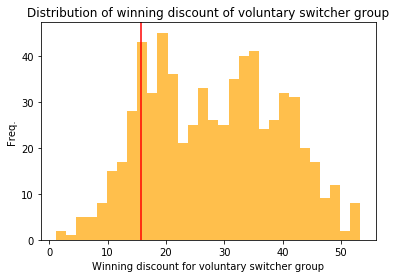

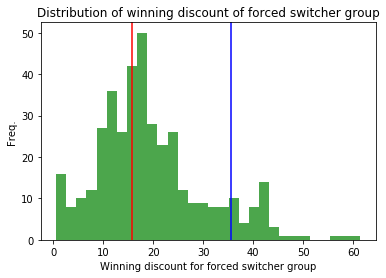

In [18]:
plot_discount_IE(data2,tab7)

---
<span style="color:orange">**NOTE**:</span> The red line is the mean of winning discount under the adoption of ABAs and the blue line is under the adoption of FPAs

---

#### Figure2. Distribution of Winning Discount of Voluntary Switcher Group

C:\Users\thxkn\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\thxkn\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(*args, **kw)>

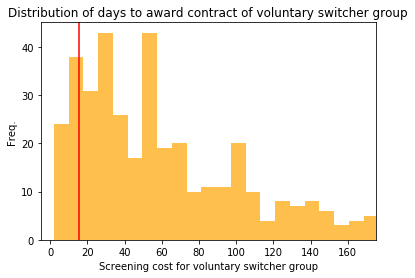

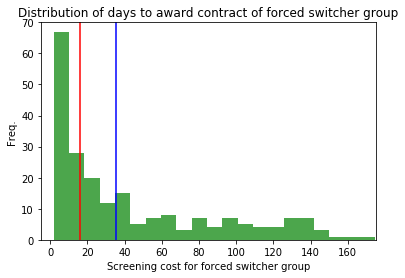

In [19]:
plot_screening_IE(data2,tab7)

---
<span style="color:orange">**NOTE**:</span> The red line is the mean of days to award contracts under the adoption of ABAs and the blue line is under the adoption of FPAs

---

---
# 6. Extension
---

### 6.1. Extension: Assumption Check with IE Sample

One of the main assumption underlying this paper was that the PAs in control groups would have adopted FPAs if so allowed. As the additional dataset, IE sample, covers the period between 2006 and 2008 when PAs are allowed to choose ABAs or FPAs, I tried to check whether the assumption is plausible or not. My strategy is to replace the treated with the PAs in the voluntarily switched group and to contstruct new control groups based on population and experience values of the voluntarily switcher group. Since I checked that IE sample is already filtered by the same standards with the main data, the basic conditions of PAs are similar. Still I could not control the features in pretreatment regime, I take PA fixed effect into accounts. The same model of Table2 and Table3 were augmented. Before proceeding the calculation, I compared the size of the treated and new control group and the control group 1 based on experience revealed the only case that the treated group and the control group are different. Therefore, in this section, I have one control group based on experience variable.

In [20]:
df_ext = extension_setting_IE(data1, data2)

#### Table8. Extension(3): Assumption Check

The estimates of both winning discount and screeing cost are statistically significant. The effect of FPAs on winning discount is around 9 percent of reserve price, which can be the saving of €135,000. The estimate on days to award is from 24 to 25 days. Compared with the base line estimates in Table2 and Table3, the estimate of winning discount is smaller than in the Municipality of Turin but bigger than in the County of Turin. The interesting finding is in screening cost. The estimates of screeing cost in this table is smaller than both in Table2 and in Table3. This part extracted the real swtichers to FPAs contrary to the paper relying on assumption that the PAs in the control groups would have abandoned ABAs if allowed. That is, the result of decreasing in screening cost is in the line with the author's finding that PAs not in favor of FPAs experience higher cost in screening bids. However, there are still several possible interpretation. For example, it is due to the larger population mean of Table8 as the author mentioned that small PAs have more burden on screening cost.

In [22]:
table_ext((vlunt_col1(df_ext),vlunt_col2(df_ext)))

Control(1)    Control(2)
Panel                         value_title                                    
A. Winning discount           First Price Auction    9.34***       9.28***   
                              Standard Error         (1.62)        (1.61)    
                              R$^2$                  0.552         0.556     
                              Observations           657           657       
B. Days to award the contract First Price Auction   25.65**       24.11**    
                              Standard Error        (10.59)       (10.98)    
                              R$^2$                 0.507         0.524      
                              Observations          379           379

#### Figure3. Visualization of Comparison to the Baseline Estimates

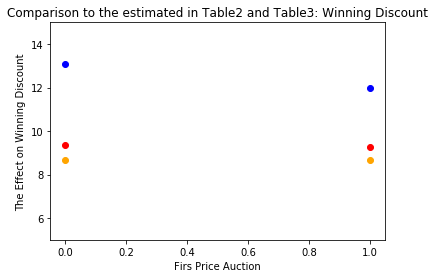

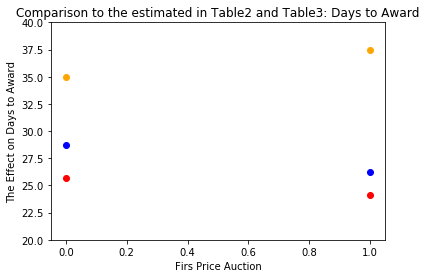

In [24]:
plot_comparions_to_baseline(table_ext((vlunt_col1(df_ext),vlunt_col2(df_ext))))

---
<span style="color:orange">**NOTE**:</span> The red dots are the results of Table8. The yellow dots are the results of Table3 and the red are Table2

---

#### Figure4. Comparison of Populations between Control Groups

To check the previous result in Table8, I compared mean of population of the control group in Table8 with the control group in Table2 abd Table3. As a result, the population of Table8 reported the smallest value among three groups. Thus, it is different from the expectation that the lower estimates of days to award in Table8 might be caused by larger population. Rather, its average population is almost half of the control groups which used in the baseline estimation. Therefore, this result support more that the differences between the estimates in Table8 and the baseline estimates are due to excluding PAs seemingly in favor in FPAs but actually not.

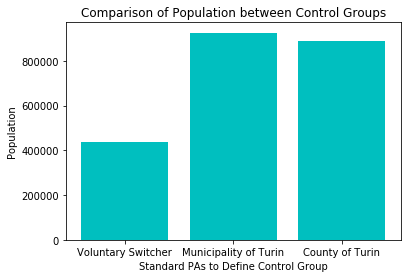

In [25]:
population_check(df, df_ext)

---
# 7. Conclusion
---

This paper studied the effect of FPAs on winning discount, performance quality and screening cost. The main methology is Difference-in-Differences regression. To interpret the coefficient of FPA variable, defining control group is important. The underlying assumptions are, first, we can assume randomness in the selection of the treated group. Secondly, the PAs in the control group would have switched to FPAs if there had not been restrictions. Also, since population and the number of times to award contracts are determinants to switch to FPAs in PA level, PA fixed effect is taken into account. As a result, the swtich to FPAs showed positive effect on winning discount both in the Municipality of Turin and the County of Turin. However, except at this awarding stage, it was revealed that FPAs induce losses as well. It lowers performance quality which is represented by cost overrun and completion delay. Moreover, it increased screening cost which is expressed by the number of days to award contract. The author checked the robustness of there baseline estimates by including time-varying variable, re-clustering standard errors and contructing subsamples.  

In the final part of this paper, the author introduced new dataset which covers the period between 2006 and 2011. In particular, between July 2006 to Oct 2008, the government allowed PAs to choose freely FPAs or ABAs, the new dataset could be helpful to check the assumption is reliable or not. He made a short look with descriptive statistics with voluntary switcher group and forced switcher group. It presented a large increase in days to award in forced switcher group. Additionally, he mentioned that screening cost would be more burden to smaller PAs since screening process is conducted usually in-house personel with PA engineers and lawyer which means relatively high fixed cost for small PAs.

Through extension section, I recontstructed control group with IE sample and replaced the treated with voluntary switcher group. This part presents that although there is difference in magnitude, statistical significance and sign of the estimates is in line with the baseline estimates. Moreover, with the comparison of population mean, I confirmed that the increase of days to awards is not due to larger PAs. Overall, the results support the baseline estimates and assumptions. Plus, I tried to examine the forced switcher group in favor of ABAs referring to the study on existence of collusion in ABAs by Decarolis and Colney(2016). I could not conduct it because to handle with it, the regression confront with sigular matrix.

This paper contribute the first empirical study on the effect of FPAs. Furthermore, it suggests that the necessity of well designed screening process for effective uses of FPAs. Reading this paper, I could learn the importance of public policy and its effect. Also, I could replicated this paper precisely with STATA code and datasets offered by Decarolis. 

---
# 8. Reference
---

* **Decarolis, Francesco(2014)**, "Awarding Price, Contract Performance, and Bids Screening: Evidence from Procurement Auctions." American Economic Journal: Applied Economics, 6 (1): 108-32.
* **Conley, Timothy G., and Francesco Decarolis (2016),** "Detecting Bidders Groups in Collusive Auctions." American Economic Journal: Microeconomics, 8 (2): 1-38.